# ML Comparisons 

Five machine learning models were compared for accuracy using seven selected features. The target is Google Rating. The features include HealthScore, three health violation categories and three facility types and one facility category.

Results: All of the machine learning models performed equally well, providing about 72% accuracy in predicting the Google Rating. AdaBoost provided a slightly higher score of 73%. 

AdaBoost was added to the ML models when the regressions techniques continued to provide lacluster results. The goal of AdaBoost is to combine many weak classifiers into a single strong classifier. In this application, AdaBoost was used with one level of decision trees; increasing decision levels did not provide better accuracy. Additionally, Neural Networks also did not prove more accurate than the regressions models. 

For simplicity sake and because it provided similiar results as more complex models, Logistic Regression is selected as the machine learning model for this project. 

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import classification models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [3]:
# Import the dataset
ml_df=pd.read_csv('ml_comp_selected_features.csv', index_col=0)
ml_df

,cat_5,cat_8,cat_14,typeOfFacility_LIMITED FOOD SERVICE CONVENIENCE OTHER,typeOfFacility_NO FEE LICENSE K12 SCHOOLS NON PROFIT,typeOfFacility_RESTAURANT MORE THAN 200 SEATS,categoryOfFacility_FAST FOOD LIMITED MENU,healthScore,googleRating
0,1,0,0,0,0,0,0,4,High
1,1,0,1,0,0,0,0,5,High
2,1,1,0,0,0,0,1,5,Low
3,1,0,0,0,0,0,0,3,High
4,1,0,0,0,0,0,0,5,Low
...,...,...,...,...,...,...,...,...,...
861,0,0,1,0,0,0,0,4,Low
862,0,0,0,0,0,0,0,5,Low
863,0,0,0,0,0,0,1,5,Low
864,1,0,0,0,0,0,0,5,High


In [4]:
# Remove Google outcome target from features data
Y = ml_df.googleRating
X = ml_df.drop(columns="googleRating")

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape

((692, 8), (692,))

In [5]:
# define the variable and then add the specifics for each classifier
names = ["Logistic_Regression", "SVM", "Random_Forest", "AdaBoost", "Neural Network"]

classifiers = [
    LogisticRegression(solver="lbfgs",max_iter=200),
    SVC(kernel='linear'),
    RandomForestClassifier(n_estimators=128, random_state=78),
    AdaBoostClassifier(random_state=1),
    MLPClassifier(alpha=1, max_iter=1000)]


In [6]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)
    
scores

[0.735632183908046,
 0.7298850574712644,
 0.7011494252873564,
 0.735632183908046,
 0.7298850574712644]

In [7]:
# Analyze the Model Performance
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Logistic_Regression,0.735632
1,SVM,0.729885
2,Random_Forest,0.701149
3,AdaBoost,0.735632
4,Neural Network,0.729885


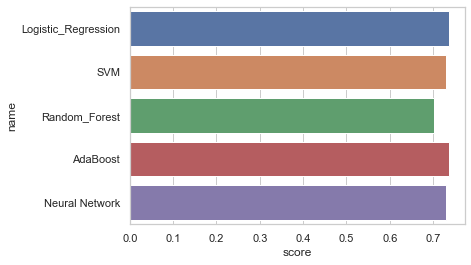

In [8]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)